In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import xarray as xr
import numpy as np
# import sys
# sys.path.append("/Users/ccamargo/Documents/py_scripts/")
import utils_SL as sl
from datetime import datetime
def get_dectime(time):
    t = [datetime.utcfromtimestamp((t- np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')) 
         for t in time]
    t = [t.timetuple().tm_year + (t.timetuple().tm_yday/365) for t in t]
    return np.array(t)


In [3]:

#%%

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cm
cmap = cm.cm.balance
import matplotlib.pyplot as plt

def plot_map( data,
             plot_type = 'pcolor',
             lon=np.arange(0,360),lat=np.arange(-90,90),
             cmap='tab10',
             cmin=0,cmax=9,
             fsize=(15,10),
             proj='robin',
             land=True,
             grid=False,
             title='',
             clabel='',
             lon0=0,
             landcolor='papayawhip',
             extent = False,
             interval=0.1,
             sig=False,
             unc=0.3
             ) :
    '''
    plot 1 variables
    '''
   
    lon[-1]=360
    plt.figure(figsize=(15,10),dpi=100)
    if proj=='robin':
        proj=ccrs.Robinson(central_longitude=lon0)
    else:
        proj=ccrs.PlateCarree()
    ax = plt.subplot(111, projection=proj
                     #Mercator()
                     )
    #ax.background_img(name='pop', resolution='high')
    if extent:    
        ax.set_extent(extent,ccrs.PlateCarree())
    else:
        ax.set_global()
    ##             min_lon,,max_lon,minlat,maxlat
    if plot_type=='pcolor':
        mm = ax.pcolormesh(lon,\
                           lat,\
                           data,
                           vmin=cmin, vmax=cmax, 
                           transform=ccrs.PlateCarree(),
                           #cmap='Spectral_r'
                           cmap=cmap
                          )
    if plot_type =='contour':
        lv=np.arange(cmin,cmax+interval,interval)
        mm=plt.contourf(lon,lat,data,levels=lv,
                  transform = ccrs.PlateCarree(),cmap=cmap)

        plt.pcolormesh(lon,lat,data,
                vmin=cmin,vmax=cmax,
                zorder=0,
                transform = ccrs.PlateCarree(),cmap=cmap)
    if sig:
            Z_insg = np.array(data)
            Z_insg[np.abs(data)>(np.array(unc))]=1
            Z_insg[np.abs(data)<(np.array(unc))]=0
            stip = plt.contourf(lon,lat, Z_insg, levels=[ -1,0, 1],
                        colors='none', hatches=[None,'...'], 
                        transform = ccrs.PlateCarree(),zorder=10)

            
    if land:
        
        
        # ax.add_feature(cfeature.LAND, facecolor=landcolor)
      
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))
       
        # resol = '50m'  # use data at this scale
       
        # land = cfeature.NaturalEarthFeature('physical', 'land', scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
        # ax.add_feature(land, facecolor='beige')

        
    # d01 box
    if grid:
        gl=ax.gridlines(draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        # gl.xformatter = LONGITUDE_FORMATTER
        # gl.yformatter = LATITUDE_FORMATTER
    plt.colorbar(mm,label=clabel,orientation='horizontal',
                     shrink=0.9)
    plt.title(title,fontsize=20)

#    plt.show()
    # plt.close()    
    return

def plot_map_subplots( datasets,
             plot_type = 'pcolor',
             lon=np.arange(0,360),lat=np.arange(-90,90),
             cmap='tab10',
             cmin=0,cmax=9,
             fsize=(15,10),
             proj='robin',
             land=True,
             grid=False,
             titles='',
             clabel='',
             lon0=210,
             landcolor='papayawhip',
             extent = False,
             interval=0.1,
             sig=False,
             unc=0.3,
              fontsize=20,
              offset_y=0
             ) :
    '''
    plot different variabls (ublots). Datasets is a list of data to be ploted
    '''
   
    lon[-1]=360
    ndata = len(datasets)
    if ndata>2:
        if ndata%2==1:
            ncol = round(ndata/2)
            nrow = ndata - ncol +1
        else:
            nrow = ndata/2
            ncol = nrow
    else:
        nrow=1;ncol=2
    fig = plt.figure(figsize=(15,10),dpi=100)
    if proj=='robin':
        proj=ccrs.Robinson(central_longitude=lon0)
    else:
        proj=ccrs.PlateCarree()
    for idata,data in enumerate(datasets):
        ax = plt.subplot(nrow,ncol,idata+1, projection=proj
                         #Mercator()
                         )
        #ax.background_img(name='pop', resolution='high')
        if extent:    
            ax.set_extent(extent,ccrs.PlateCarree())
        else:
            ax.set_global()
        ##             min_lon,,max_lon,minlat,maxlat
        if plot_type=='pcolor':
            mm = ax.pcolormesh(lon,\
                               lat,\
                               data,
                               vmin=cmin, vmax=cmax, 
                               transform=ccrs.PlateCarree(),
                               #cmap='Spectral_r'
                               cmap=cmap
                              )
        if plot_type =='contour':
            lv=np.arange(cmin,cmax+interval,interval)
            mm=plt.contourf(lon,lat,data,levels=lv,
                      transform = ccrs.PlateCarree(),cmap=cmap)
    
            plt.pcolormesh(lon,lat,data,
                    vmin=cmin,vmax=cmax,
                    zorder=0,
                    transform = ccrs.PlateCarree(),cmap=cmap)
        if sig:
                Z_insg = np.array(data)
                Z_insg[np.abs(data)>(np.array(unc))]=1
                Z_insg[np.abs(data)<(np.array(unc))]=0
                plt.contourf(lon,lat, Z_insg, levels=[ -1,0, 1],
                            colors='none', hatches=[None,'...'], 
                            transform = ccrs.PlateCarree(),zorder=10)
    
                
        if land:
            ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))
           
        # d01 box
        if grid:
            gl=ax.gridlines(draw_labels=True)
            gl.top_labels = False
            gl.right_labels = False
            # gl.xformatter = LONGITUDE_FORMATTER
            # gl.yformatter = LATITUDE_FORMATTER
        plt.title(titles[idata],fontsize=20)

    plt.tight_layout()
    # # fig.subplots_adjust(right=0.8)
    cbar_ax2 = fig.add_axes([0.25, 0.1+offset_y, 0.5, 0.04])
    cbar2=plt.colorbar(mm, cax=cbar_ax2,orientation='horizontal')
    cbar2.set_label(label=clabel,size=fontsize-5, family='serif')    
    cbar2.ax.tick_params(labelsize=fontsize-5) 

#    plt.show()
    # plt.close()    
    return

In [4]:
def cluster_mean(data,mask,
                 time=[0],
                 lat=[0],
                 lon=[0],
                 norm=True,
                 stats='mean'):
    ''' 
    Function to compute mean, min max time series of a dataset, given a mask
    If norm=True, then data is normalized by range before computing mean,min,max
    returns a time series which has mean on axis 0, min on axis 1 and max on axis 2
    '''
    dims=data.shape
    if len(dims)==3:
        if len(lat)!=dims[1]:
            lat = np.arange(0,dims[1])
        if len(lon)!=dims[2]:
            lon=np.arange(0,dims[2])
        if len(time)!=dims[0]:
            time = np.arange(0,dims[0])
        da = xr.Dataset(data_vars={'data':(('time','lat','lon'),data*mask),                          
                               },
                    coords={'lat':lat,
                            'lon':lon,
                            'time':time,
                            }
                    )
    if len(dims)==2:
        if len(lat)!=dims[0]:
            lat = np.arange(0,dims[0])
        if len(lon)!=dims[1]:
            lon=np.arange(0,dims[1])

        da = xr.Dataset(data_vars={'data':(('lat','lon'),data*mask),                          
                               },
                    coords={'lat':lat,
                            'lon':lon,
                            }
                    )        
    if norm:
        da['data']=da.data - da.data.mean()
    if stats =='all':
        time_series=np.zeros((3,dims[0]))
        time_series[0,:] = da.data.mean(dim=('lat','lon')).data 
        time_series[1,:] = da.data.min(dim=('lat','lon')).data
        time_series[2,:] = da.data.max(dim=('lat','lon')).data
    elif stats=='mean':
        time_series = da.data.mean(dim=('lat','lon')).data 

    
    return time_series

In [5]:
#%% get budget components
path = '/Volumes/LaCie_NIOZ/data/budget/' 

period = (1993,2017) # full years
y0,y1=period
t0='{}-01-01'.format(y0)
t1='{}-12-31'.format(y1-1)


In [6]:
#%%  alt
file = 'alt.nc'
ds=xr.open_dataset(path+file)
ds = ds.sel(time=slice(t0,t1))
# ensemble:
alt = np.array(ds.sel(names='ENS')['SLA']) # mm
tdec = get_dectime(ds.time)
alt_trend , _ = sl.get_reg_trend(tdec,alt,lat=np.array(ds.lat),lon=np.array(ds.lon)) # mm
das = {file:ds}

X=np.array(ds.lon)
Y = np.array(ds.lat)

/Users/ccamargo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  if __name__ == '__main__':


In [7]:
#%% land mask
da = ds['sla_ens'][0,:,:]
da = da.where((ds.lat>-66) & (ds.lat<66),np.nan)
# da.plot()
landmask = np.array(da.data)
landmask[np.isfinite(landmask)]=1
# plt.pcolor(mask)

In [8]:
#%% steric
file = 'steric_full.nc'
ds=xr.open_dataset(path+file)
ds = ds.sel(time=slice(t0,t1))
das[file] = ds

ste = np.array(ds.sel(names='ENS')['steric_full'] * 1000) # mm
ste_trend , _= sl.get_reg_trend(tdec,ste,lat=np.array(ds.lat),lon=np.array(ds.lon)) # mm

ste_up = np.array(ds.sel(names='ENS')['steric_up'] * 1000) # mm
ste_trend_up , _= sl.get_reg_trend(tdec,ste_up,lat=np.array(ds.lat),lon=np.array(ds.lon)) # mm

ste_deep = np.array(ds['steric_deep']) # mm
ste_trend_deep , _= sl.get_reg_trend(tdec,ste_deep,lat=np.array(ds.lat),lon=np.array(ds.lon)) # mm


In [9]:
#%% dynamic & sterodynamic
file = 'dynamic_sl.nc'
ds=xr.open_dataset(path+file)
ds = ds.sel(time=slice(t0,t1))
dyn = np.array(ds.sel(names='ENS')['DSL'] * 1000) # mm
dyn_trend , _= sl.get_reg_trend(tdec,dyn,lat=np.array(ds.lat),lon=np.array(ds.lon)) # mm
# sterodynamic
sdsl = np.array(ds.sel(names='ENS')['SDSL'] * 1000) # mm
sdsl_trend , _= sl.get_reg_trend(tdec,sdsl,lat=np.array(ds.lat),lon=np.array(ds.lon)) # mm

das[file] = ds



In [10]:
#%% barystatic
file = 'barystatic_asl_trends.nc' # trends - ASL
ds=xr.open_dataset(path+file)
ds = ds.sel(period='{}-{}'.format(y0,y1))
bar_trend = np.array(ds.sel(names='IMB_WGP')['SLA']) # mm
bar_unc = np.array(ds.sel(names='IMB_WGP')['SLA_UNC'])
das[file] = ds


file = 'barystatic_rsl_trends.nc' # trens RSL
ds=xr.open_dataset(path+file)
ds = ds.sel(period='{}-{}'.format(y0,y1))
bar_trend_rsl = np.array(ds.sel(names='IMB_WGP')['SLA']) # mm
das[file] = ds


In [11]:

file = 'barystatic_timeseries.nc'
ds=xr.open_dataset(path+file)
ds=ds['SLF_ASL'].sel(reconstruction='ENS')
ds = ds.sel(time=slice(t0,t1))
bar_ts = np.array(ds.data)
das[file] = ds


In [12]:
titles = ['Altimetry', 'Barystatic' ,'Steric (0-2000m)', 'Steric (>2000m)', 'Dynamic']
datasets = [alt_trend, bar_trend, ste_trend_up, ste_trend_deep, dyn_trend]
datasets_ts = [alt, bar_ts, ste_up, ste_deep, dyn]
# datasets_ts = [alt, ste_up, ste_up, ste_deep, dyn]


# Figure 1

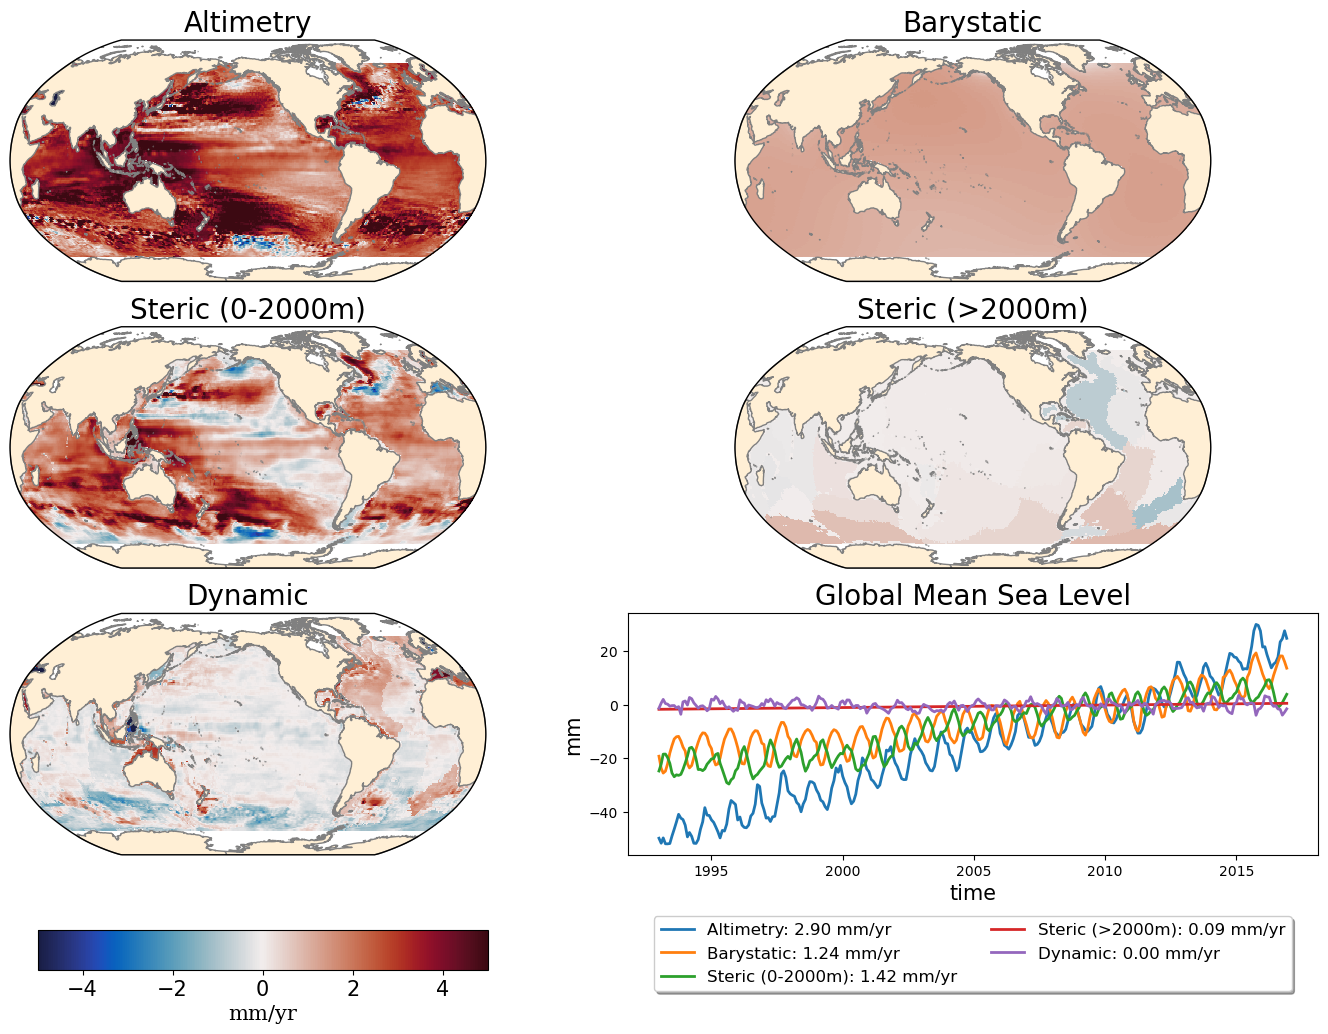

In [13]:

X[-1]=360
X[0]=0

nrow=3
ncol=2

proj='robin'
lon0=210
plot_type='pcolor'
interval=1
clim=5
cmin=-clim
cmax=clim
cmap = cm.cm.balance
landcolor='papayawhip'
fontsize=20
sig=False
fig = plt.figure(figsize=(15,10),dpi=100)

if proj=='robin':
    proj=ccrs.Robinson(central_longitude=lon0)
else:
    proj=ccrs.PlateCarree()
for idata,data in enumerate(datasets):
    data = data*landmask
    ax = plt.subplot(nrow,ncol,idata+1, projection=proj
                     #Mercator()
                     )
    #ax.background_img(name='pop', resolution='high')
    ax.set_global()
    ##             min_lon,,max_lon,minlat,maxlat
    if plot_type=='pcolor':
        mm = ax.pcolormesh(X,\
                           Y,\
                           data,
                           vmin=cmin, vmax=cmax, 
                           transform=ccrs.PlateCarree(),
                           #cmap='Spectral_r'
                           cmap=cmap
                          )
    if plot_type =='contour':
        lv=np.arange(cmin,cmax+interval,interval)
        mm=plt.contourf(X,Y,data,levels=lv,
                  transform = ccrs.PlateCarree(),cmap=cmap)

        plt.pcolormesh(X,Y,data,
                vmin=cmin,vmax=cmax,
                zorder=0,
                transform = ccrs.PlateCarree(),cmap=cmap)
    if sig:
            Z_insg = np.array(data)
            Z_insg[np.abs(data)>(np.array(unc))]=1
            Z_insg[np.abs(data)<(np.array(unc))]=0
            plt.contourf(X,Y, Z_insg, levels=[ -1,0, 1],
                        colors='none', hatches=[None,'...'], 
                        transform = ccrs.PlateCarree(),zorder=10)


    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

    # d01 box

    plt.title(titles[idata],fontsize=20)



ax2 = plt.subplot(nrow,ncol,idata+2)
for idata,data in enumerate(datasets_ts):
    data = data*landmask
    mu = np.nanmean(data,axis=(1,2))
    out = sl.get_ts_trend(tdec,mu,plot=False)
    tr = np.round(out[0],2)
    if tr==0:
        tr=0.00
    ax2.plot(tdec, mu - np.nanmean(mu[144:276]),
            label='{}: {:.2f} mm/yr'.format(titles[idata],tr),
            linewidth=2)
plt.title('Global Mean Sea Level',fontsize=fontsize)
plt.ylabel('mm',fontsize=fontsize-5)
plt.xlabel('time',fontsize=fontsize-5)
#. plt.legend(fontsize=fontsize-5)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6),
          ncol=2, 
           fancybox=True, 
           shadow=True,
           fontsize=fontsize-8)

plt.tight_layout()
# # fig.subplots_adjust(right=0.8)
cbar_ax2 = fig.add_axes([0.1,0.025, 0.3, 0.04])
cbar2=plt.colorbar(mm, cax=cbar_ax2,orientation='horizontal')
cbar2.set_label(label='mm/yr',size=fontsize-5, family='serif')    
cbar2.ax.tick_params(labelsize=fontsize-5) 

plt.show()
# plt.close()    


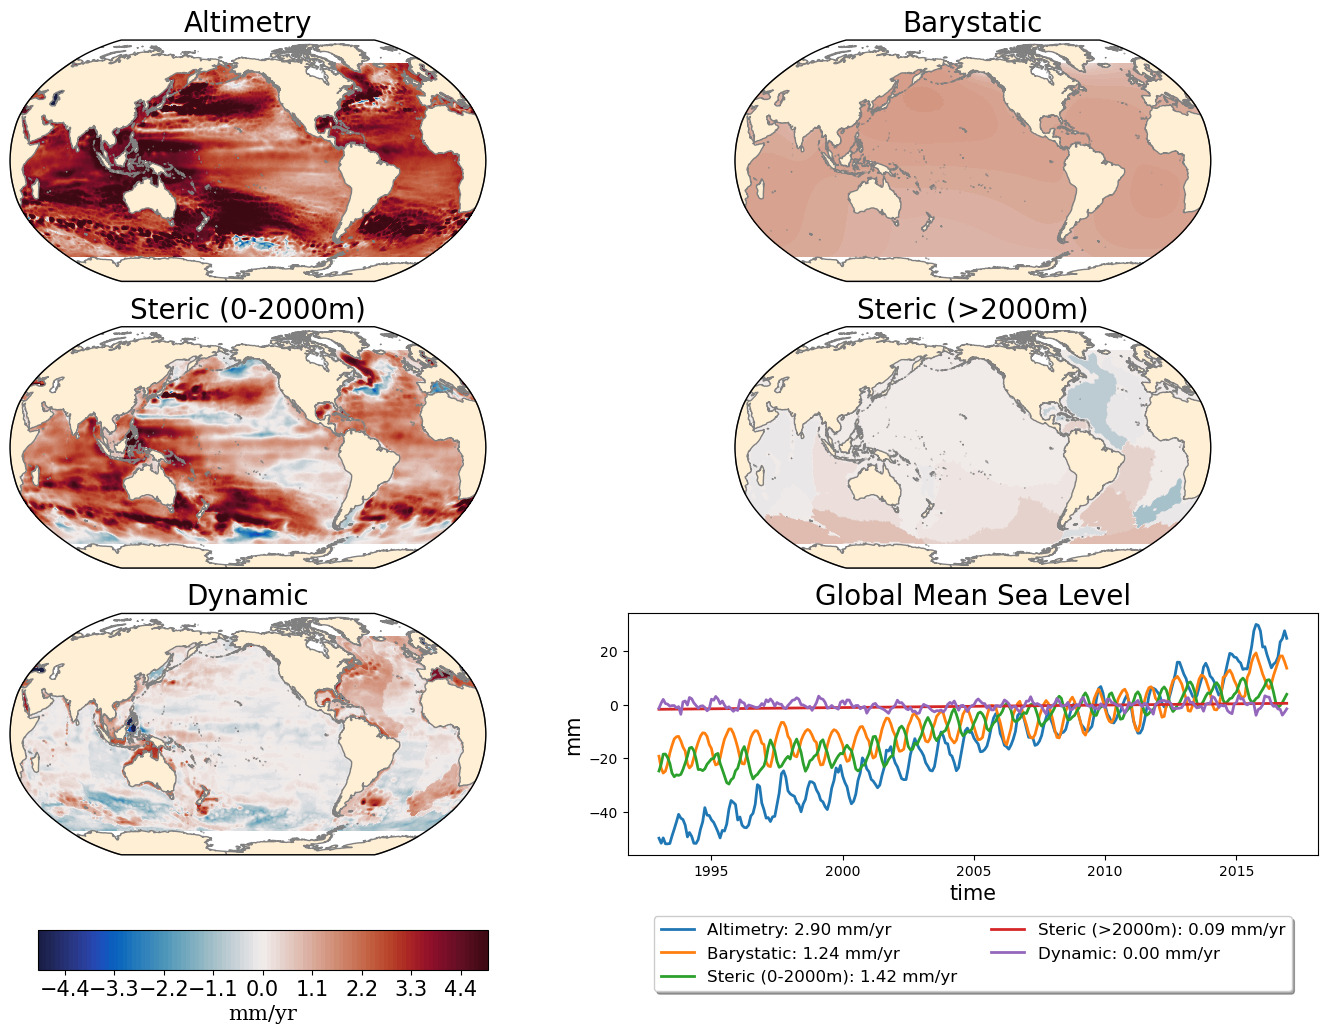

In [14]:

X[-1]=360
X[0]=0

nrow=3
ncol=2

proj='robin'
lon0=210
plot_type='contour'
interval=0.1
clim=5
cmin=-clim
cmax=clim
cmap = cm.cm.balance
landcolor='papayawhip'
fontsize=20
sig=False
fig = plt.figure(figsize=(15,10),dpi=100)

if proj=='robin':
    proj=ccrs.Robinson(central_longitude=lon0)
else:
    proj=ccrs.PlateCarree()
for idata,data in enumerate(datasets):
    data = data*landmask
    ax = plt.subplot(nrow,ncol,idata+1, projection=proj
                     #Mercator()
                     )
    #ax.background_img(name='pop', resolution='high')
    ax.set_global()
    ##             min_lon,,max_lon,minlat,maxlat
    if plot_type=='pcolor':
        mm = ax.pcolormesh(X,\
                           Y,\
                           data,
                           vmin=cmin, vmax=cmax, 
                           transform=ccrs.PlateCarree(),
                           #cmap='Spectral_r'
                           cmap=cmap
                          )
    if plot_type =='contour':
        lv=np.arange(cmin,cmax+interval,interval)
        mm=plt.contourf(X,Y,data,levels=lv,
                  transform = ccrs.PlateCarree(),cmap=cmap)

        plt.pcolormesh(X,Y,data,
                vmin=cmin,vmax=cmax,
                zorder=0,
                transform = ccrs.PlateCarree(),cmap=cmap)
    if sig:
            Z_insg = np.array(data)
            Z_insg[np.abs(data)>(np.array(unc))]=1
            Z_insg[np.abs(data)<(np.array(unc))]=0
            plt.contourf(X,Y, Z_insg, levels=[ -1,0, 1],
                        colors='none', hatches=[None,'...'], 
                        transform = ccrs.PlateCarree(),zorder=10)


    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

    # d01 box

    plt.title(titles[idata],fontsize=20)



ax2 = plt.subplot(nrow,ncol,idata+2)
for idata,data in enumerate(datasets_ts):
    data = data*landmask
    mu = np.nanmean(data,axis=(1,2))
    out = sl.get_ts_trend(tdec,mu,plot=False)
    tr = np.round(out[0],2)
    if tr==0:
        tr=0.00
    ax2.plot(tdec, mu - np.nanmean(mu[144:276]),
            label='{}: {:.2f} mm/yr'.format(titles[idata],tr),
            linewidth=2)
plt.title('Global Mean Sea Level',fontsize=fontsize)
plt.ylabel('mm',fontsize=fontsize-5)
plt.xlabel('time',fontsize=fontsize-5)
#. plt.legend(fontsize=fontsize-5)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6),
          ncol=2, 
           fancybox=True, 
           shadow=True,
           fontsize=fontsize-8)

plt.tight_layout()
# # fig.subplots_adjust(right=0.8)
cbar_ax2 = fig.add_axes([0.1,0.025, 0.3, 0.04])
cbar2=plt.colorbar(mm, cax=cbar_ax2,orientation='horizontal')
cbar2.set_label(label='mm/yr',size=fontsize-5, family='serif')    
cbar2.ax.tick_params(labelsize=fontsize-5) 

plt.show()
# plt.close()    


# Figure 2

In [15]:
#%% budget
sum_comp = np.array(bar_trend+ste_trend
                     +dyn_trend
                   )
res = np.array(alt_trend - sum_comp)
# or
# res = np.array((alt_trend - dyn_trend) - (ste_trend+bar_trend))

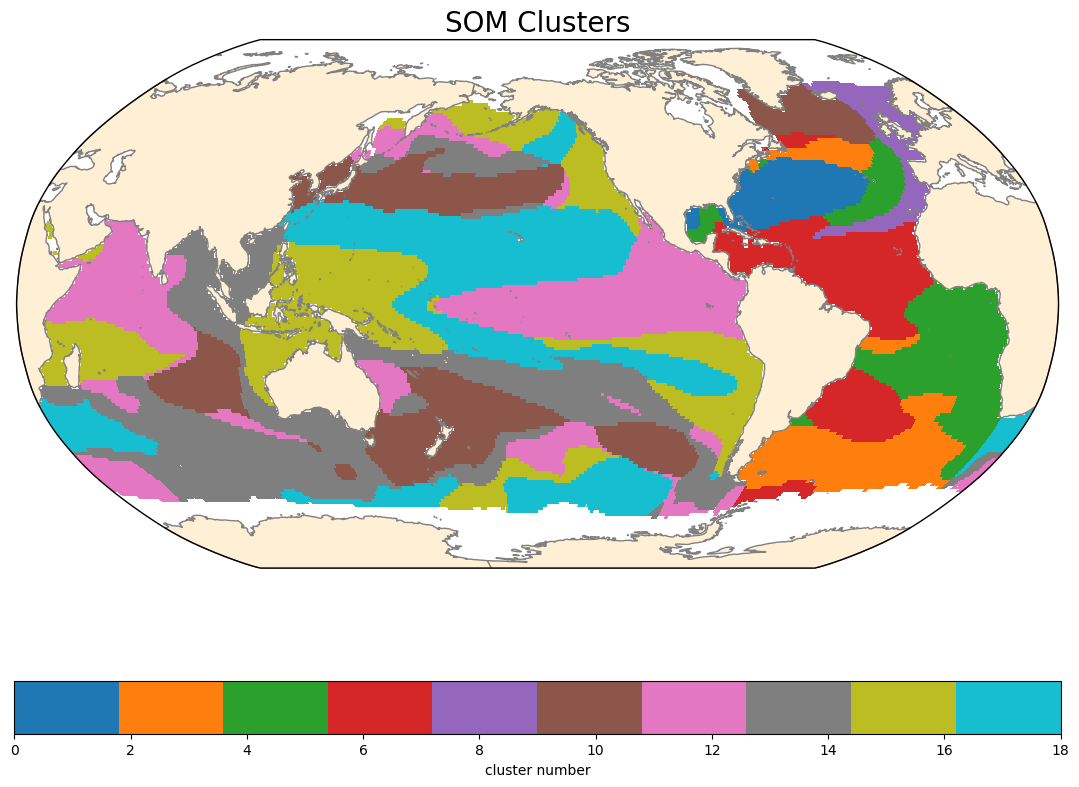

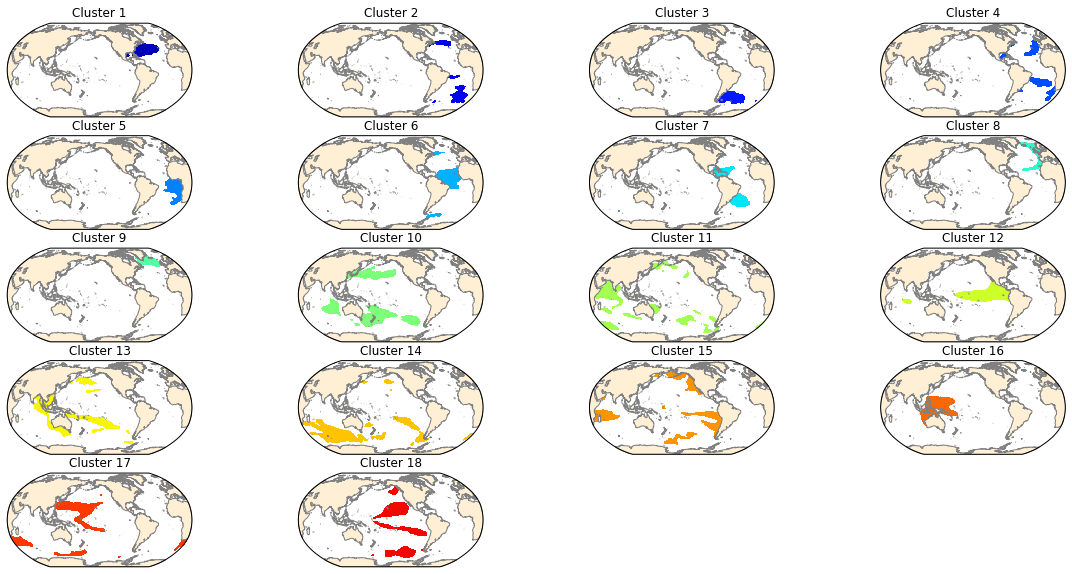

In [16]:
#%% SOM regions
path = '//Volumes/LaCie_NIOZ/budget/regions/som/'
file= 'som_3x3_alt_1993_2019_n10_sig2_ep_atlantic_indopacific'
ds=xr.open_dataset(path+file+'.nc')

mask_clusters = np.array(ds.mask)
n_clusters = len(np.unique(mask_clusters[np.isfinite(mask_clusters)]))
plot_map(mask_clusters,cmax=n_clusters,lon0=210,title='SOM Clusters',clabel='cluster number')

mask_comb = np.array(mask_clusters)
x=4
y=5
plt.figure(figsize=(20,10))
for i in range(0,int(np.nanmax(mask_comb))):
    icluster = i+1
    ax = plt.subplot(y,x,icluster, projection = ccrs.Robinson(central_longitude=210))
    ax.set_global()
    mask=np.array(mask_comb)
    mask[np.where(mask!=icluster)]=np.nan
    mm = ax.pcolormesh(ds.lon,\
                       ds.lat,\
                       mask,
                       vmin=0, vmax=x*y, 
                       transform=ccrs.PlateCarree(),
                       #cmap='Spectral_r'
                       cmap='jet'
                      )
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', 
                                                edgecolor='gray', facecolor='papayawhip'))
    plt.title('Cluster {}'.format(icluster))
plt.show()

In [17]:
# SOM residuals

res_som = np.full_like(np.zeros((180,360)),np.nan)
unc_som = np.full_like(res_som,np.nan)
# tr=np.zeros((n_clusters))
for i in range(n_clusters):
    icluster = i+1
    mask=np.array(mask_clusters)
    mask[np.where(mask!=icluster)]=np.nan
    mask[np.isfinite(mask)]=1

    # tr[i]=cluster_mean(np.array(res), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    res_som[mask==1] = cluster_mean(np.array(res), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    
   
    unc_som[mask==1] = cluster_mean(np.array(bar_unc), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    
    


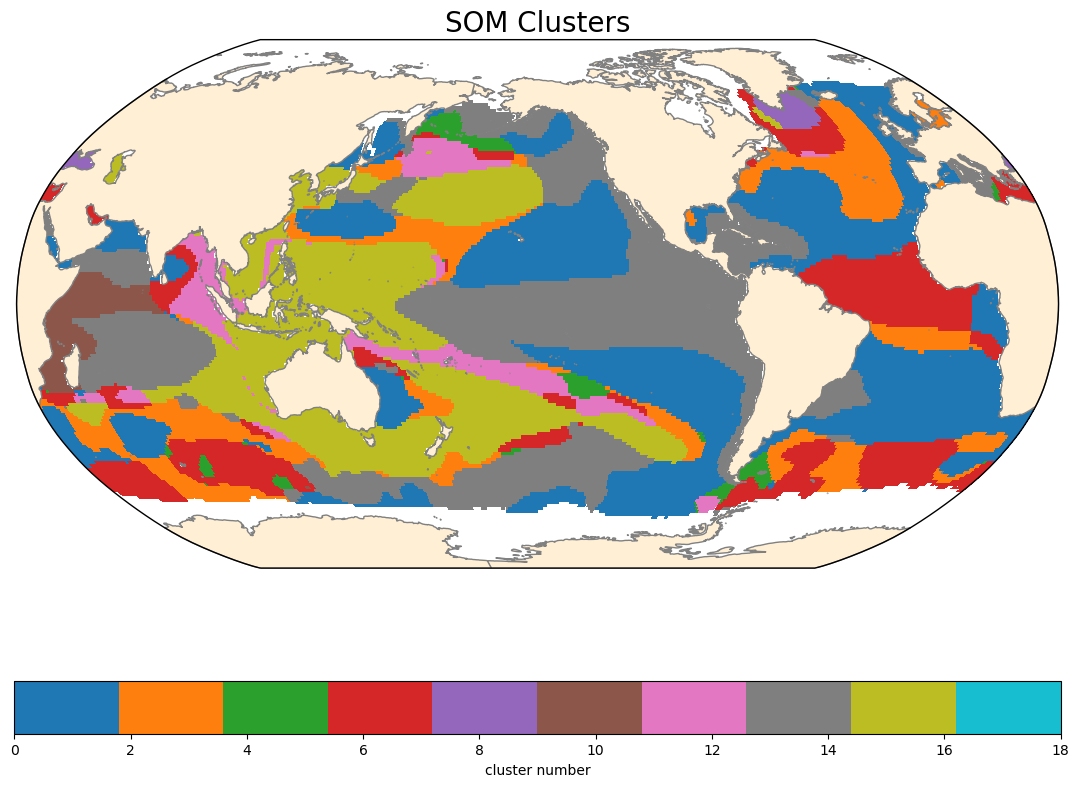

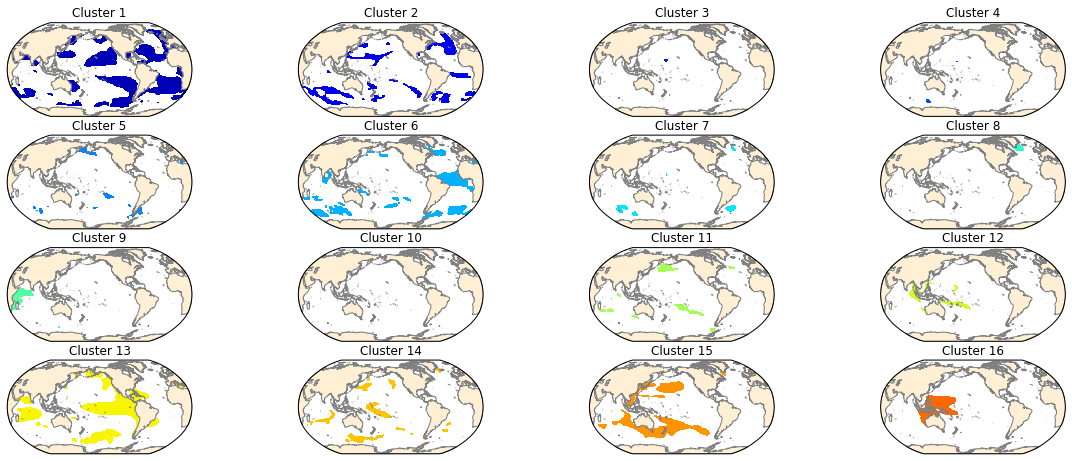

In [18]:
#%% dmaps regions

#%% SOM regions
path = '//Volumes/LaCie_NIOZ/budget/regions/som/'
file= 'som_4x4_alt_1993_2019_n10_sig2_ep_world'
ds=xr.open_dataset(path+file+'.nc')

mask_clusters_dmap = np.array(ds.regions)
n_clusters_dmap = len(np.unique(mask_clusters_dmap[np.isfinite(mask_clusters_dmap)]))
plot_map(mask_clusters_dmap,cmax=n_clusters,lon0=210,title='SOM Clusters',clabel='cluster number')
mask_comb = np.array(mask_clusters_dmap)
x=4
y=5
plt.figure(figsize=(20,10))
for i in range(0,int(np.nanmax(mask_comb))):
    icluster = i+1
    ax = plt.subplot(y,x,icluster, projection = ccrs.Robinson(central_longitude=210))
    ax.set_global()
    mask=np.array(mask_comb)
    mask[np.where(mask!=icluster)]=np.nan
    mm = ax.pcolormesh(ds.lon,\
                       ds.lat,\
                       mask,
                       vmin=0, vmax=x*y, 
                       transform=ccrs.PlateCarree(),
                       #cmap='Spectral_r'
                       cmap='jet'
                      )
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', 
                                                edgecolor='gray', facecolor='papayawhip'))
    plt.title('Cluster {}'.format(icluster))
plt.show()

In [19]:
# dMAPS residuals

res_dmap = np.full_like(np.zeros((180,360)),np.nan)
unc_dmap = np.full_like(res_som,np.nan)
# tr=np.zeros((n_clusters))
for i in range(n_clusters_dmap+1):
    icluster = i+1
    mask=np.array(mask_clusters_dmap)
    mask[np.where(mask!=icluster)]=np.nan
    mask[np.isfinite(mask)]=1

    # tr[i]=cluster_mean(np.array(res), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    res_dmap[mask==1] = cluster_mean(np.array(res), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    
   
    unc_dmap[mask==1] = cluster_mean(np.array(bar_unc), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    
    

/Users/ccamargo/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


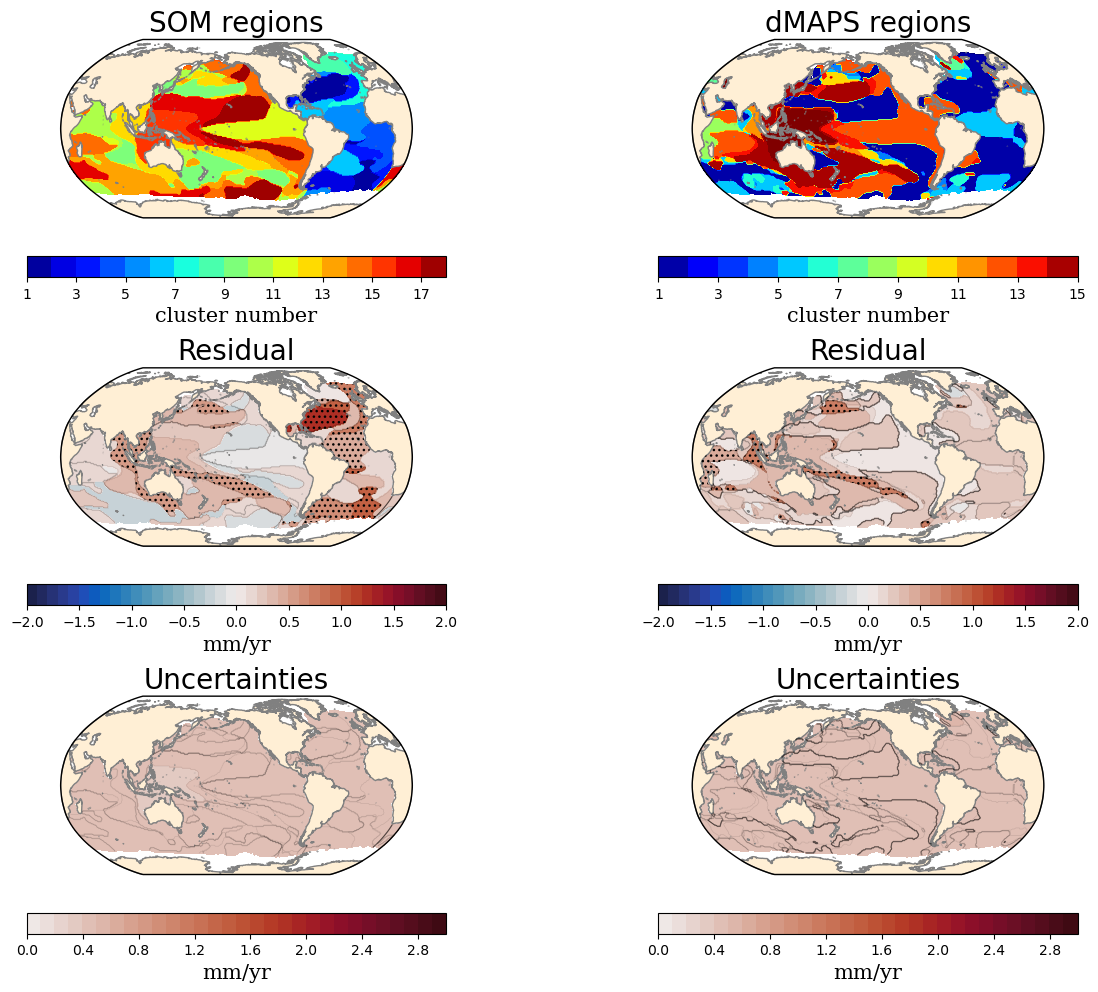

In [20]:
fig = plt.figure(figsize=(15,10),dpi=100)
proj='robin'
lon0=210
if proj=='robin':
    proj=ccrs.Robinson(central_longitude=lon0)
else:
    proj=ccrs.PlateCarree()

cmapunc = cm.tools.crop(cm.cm.balance, 0,3,0)
# SOM regions
iplot=1
cmin=1; cmax = n_clusters; cmap='jet'
interval=1
data = np.array(mask_clusters)
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )
ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),cmap=cmap)

plt.pcolormesh(X,Y,data,
        vmin=cmin,vmax=cmax,
        zorder=0,
        transform = ccrs.PlateCarree(),cmap=cmap)

plt.title('SOM regions',fontsize=fontsize)



cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('cluster number',size=fontsize-5, family='serif')

# SOM res
iplot=3
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )

ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

# plot residuals
cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=0.1
data = np.array(res_som)

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               # colors='black'
                
               cmap=cmap
              )
unc=np.array(unc_som)
Z_insg = np.array(data)
Z_insg[np.abs(data)>(np.array(unc))]=1
Z_insg[np.abs(data)<(np.array(unc))]=0
plt.contourf(X,Y, Z_insg, levels=[ -1,0, 1],
            colors='none', hatches=[None,'...'], 
             # alpha=0.1,
            transform = ccrs.PlateCarree(),zorder=10)
            
# contour cluster regions
cmin=1; cmax = n_clusters;
# cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=1
data = np.array(mask_clusters)
lv=np.arange(cmin,cmax+interval,interval)
plt.contour(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               colors='black',
            linewidths=0.5,
            alpha=0.1,
               # cmap=cmap
              )
plt.title('Residual',fontsize=fontsize)
cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('mm/yr',size=fontsize-5, family='serif')


# SOM unc
iplot=5
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )

ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

# plot unc
cmin=0; cmax = 3; cmap=cmapunc
interval=0.1
data = np.array(unc_som)

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               # colors='black'
                
               cmap=cmap
              )
unc=np.array(unc_som)
            
# contour cluster regions
cmin=1; cmax = n_clusters;
# cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=1
data = np.array(mask_clusters)
lv=np.arange(cmin,cmax+interval,interval)
plt.contour(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               colors='black',
            linewidths=0.5,
            alpha=0.1,
               # cmap=cmap
              )
plt.title('Uncertainties',fontsize=fontsize)
cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('mm/yr',size=fontsize-5, family='serif')




##################
## dmaps
# SOM regions
iplot=2
cmin=1; cmax = n_clusters_dmap; cmap='jet'
interval=1
data = np.array(mask_clusters_dmap)
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )
ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),cmap=cmap)

plt.pcolormesh(X,Y,data,
        vmin=cmin,vmax=cmax,
        zorder=0,
        transform = ccrs.PlateCarree(),cmap=cmap)

plt.title('dMAPS regions',fontsize=fontsize)



cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('cluster number',size=fontsize-5, family='serif')

# SOM res
iplot=4
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )

ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

# plot residuals
cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=0.1
data = np.array(res_dmap)

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               # colors='black'
                
               cmap=cmap
              )
unc=np.array(unc_dmap)
Z_insg = np.array(data)
Z_insg[np.abs(data)>(np.array(unc))]=1
Z_insg[np.abs(data)<(np.array(unc))]=0
plt.contourf(X,Y, Z_insg, levels=[ -1,0, 1],
            colors='none', hatches=[None,'...'], 
             # alpha=0.1,
            transform = ccrs.PlateCarree(),zorder=10)
            
# contour cluster regions
cmin=1; cmax = n_clusters_dmap;
# cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=1
data = np.array(mask_clusters_dmap)
lv=np.arange(cmin,cmax+interval,interval)
plt.contour(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               colors='black',
            linewidths=0.5,
            alpha=0.1,
               # cmap=cmap
              )
plt.title('Residual',fontsize=fontsize)
cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('mm/yr',size=fontsize-5, family='serif')


# SOM unc
iplot=6
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )

ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

# plot unc
cmin=0; cmax = 3; cmap=cmapunc
interval=0.1
data = np.array(unc_dmap)

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               # colors='black'
                
               cmap=cmap
              )
unc=np.array(unc_dmap)
            
# contour cluster regions
cmin=1; cmax = n_clusters_dmap;
# cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=1
data = np.array(mask_clusters_dmap)
lv=np.arange(cmin,cmax+interval,interval)
plt.contour(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               colors='black',
            linewidths=0.5,
            alpha=0.1,
               # cmap=cmap
              )
plt.title('Uncertainties',fontsize=fontsize)
cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('mm/yr',size=fontsize-5, family='serif')




plt.tight_layout()
plt.show()

# Figure: Testing sensitivy to components

In [27]:
res1 = np.array(alt_trend - (bar_trend + ste_trend_up))
res2 = np.array(alt_trend - (bar_trend + ste_trend))
res3 = np.array(alt_trend - (bar_trend + ste_trend + dyn_trend))
budgets = ['Alt - (bar + steric (0-2000m))', 'Alt - (bar + steric (full))','Alt - (bar + steric (full) + dyn)',]

# SOM residuals
res_som1 = np.full_like(np.zeros((180,360)),np.nan)
res_som2 = np.full_like(res_som1,np.nan)
res_som3 = np.full_like(res_som1,np.nan)

for i in range(n_clusters):
    icluster = i+1
    mask=np.array(mask_clusters)
    mask[np.where(mask!=icluster)]=np.nan
    mask[np.isfinite(mask)]=1

    # tr[i]=cluster_mean(np.array(res), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    res_som1[mask==1] = cluster_mean(np.array(res1), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    res_som2[mask==1] = cluster_mean(np.array(res2), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    res_som3[mask==1] = cluster_mean(np.array(res3), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)

# dmaps residuals
res_dmap1 = np.full_like(np.zeros((180,360)),np.nan)
res_dmap2 = np.full_like(res_som1,np.nan)
res_dmap3 = np.full_like(res_som1,np.nan)

for i in range(n_clusters_dmap+1):
    icluster = i+1
    mask=np.array(mask_clusters_dmap)
    mask[np.where(mask!=icluster)]=np.nan
    mask[np.isfinite(mask)]=1

    # tr[i]=cluster_mean(np.array(res), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    res_dmap1[mask==1] = cluster_mean(np.array(res1), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    res_dmap2[mask==1] = cluster_mean(np.array(res2), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
    res_dmap3[mask==1] = cluster_mean(np.array(res3), mask,lat=np.array(ds.lat),lon=np.array(ds.lon),norm=False)
   

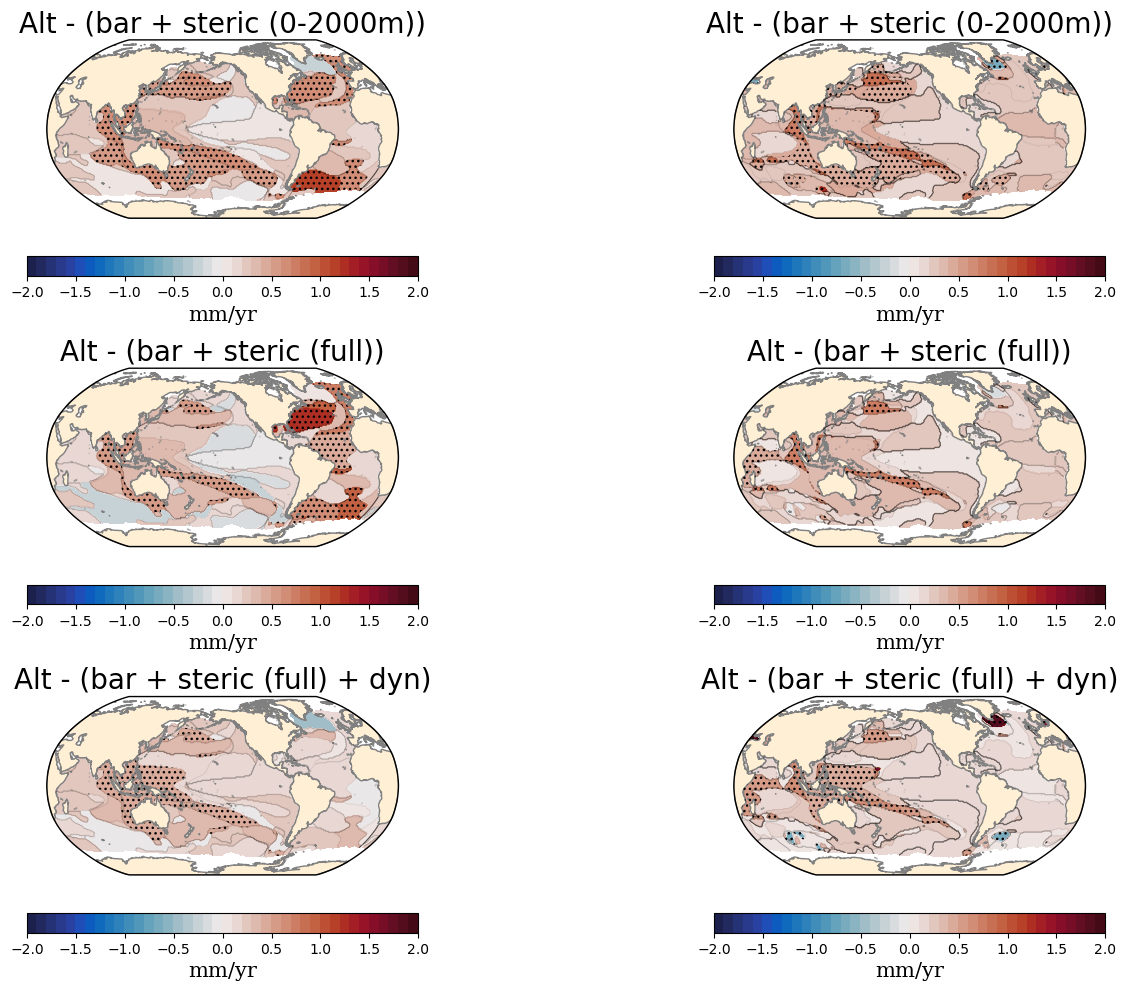

In [28]:
fig = plt.figure(figsize=(15,10),dpi=100)
proj='robin'
lon0=210
if proj=='robin':
    proj=ccrs.Robinson(central_longitude=lon0)
else:
    proj=ccrs.PlateCarree()

# SOM regions
iplot=1
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )

ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

# plot residuals
cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=0.1
data = np.array(res_som1)

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               # colors='black'
                
               cmap=cmap
              )
unc=np.array(unc_som)
Z_insg = np.array(data)
Z_insg[np.abs(data)>(np.array(unc))]=1
Z_insg[np.abs(data)<(np.array(unc))]=0
plt.contourf(X,Y, Z_insg, levels=[ -1,0, 1],
            colors='none', hatches=[None,'...'], 
             # alpha=0.1,
            transform = ccrs.PlateCarree(),zorder=10)
            
# contour cluster regions
cmin=1; cmax = n_clusters;
# cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=1
data = np.array(mask_clusters)
lv=np.arange(cmin,cmax+interval,interval)
plt.contour(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               colors='black',
            linewidths=0.5,
            alpha=0.1,
               # cmap=cmap
              )
plt.title(budgets[0],fontsize=fontsize)
cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('mm/yr',size=fontsize-5, family='serif')


# SOM res
iplot=3
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )

ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

# plot residuals
cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=0.1
data = np.array(res_som2)

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               # colors='black'
                
               cmap=cmap
              )
unc=np.array(unc_som)
Z_insg = np.array(data)
Z_insg[np.abs(data)>(np.array(unc))]=1
Z_insg[np.abs(data)<(np.array(unc))]=0
plt.contourf(X,Y, Z_insg, levels=[ -1,0, 1],
            colors='none', hatches=[None,'...'], 
             # alpha=0.1,
            transform = ccrs.PlateCarree(),zorder=10)
            
# contour cluster regions
cmin=1; cmax = n_clusters;
# cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=1
data = np.array(mask_clusters)
lv=np.arange(cmin,cmax+interval,interval)
plt.contour(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               colors='black',
            linewidths=0.5,
            alpha=0.1,
               # cmap=cmap
              )
plt.title(budgets[1],fontsize=fontsize)
cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('mm/yr',size=fontsize-5, family='serif')


# SOM unc
iplot=5
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )

ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

# plot residuals
cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=0.1
data = np.array(res_som3)

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               # colors='black'
                
               cmap=cmap
              )
unc=np.array(unc_som)
Z_insg = np.array(data)
Z_insg[np.abs(data)>(np.array(unc))]=1
Z_insg[np.abs(data)<(np.array(unc))]=0
plt.contourf(X,Y, Z_insg, levels=[ -1,0, 1],
            colors='none', hatches=[None,'...'], 
             # alpha=0.1,
            transform = ccrs.PlateCarree(),zorder=10)
            
# contour cluster regions
cmin=1; cmax = n_clusters;
# cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=1
data = np.array(mask_clusters)
lv=np.arange(cmin,cmax+interval,interval)
plt.contour(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               colors='black',
            linewidths=0.5,
            alpha=0.1,
               # cmap=cmap
              )
plt.title(budgets[2],fontsize=fontsize)
cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('mm/yr',size=fontsize-5, family='serif')



#### dmaps
# SOM regions
iplot=2
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )

ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

# plot residuals
cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=0.1
data = np.array(res_dmap1)

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               # colors='black'
                
               cmap=cmap
              )
unc=np.array(unc_dmap)
Z_insg = np.array(data)
Z_insg[np.abs(data)>(np.array(unc))]=1
Z_insg[np.abs(data)<(np.array(unc))]=0
plt.contourf(X,Y, Z_insg, levels=[ -1,0, 1],
            colors='none', hatches=[None,'...'], 
             # alpha=0.1,
            transform = ccrs.PlateCarree(),zorder=10)
            
# contour cluster regions
cmin=1; cmax = n_clusters_dmap;
# cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=1
data = np.array(mask_clusters_dmap)
lv=np.arange(cmin,cmax+interval,interval)
plt.contour(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               colors='black',
            linewidths=0.5,
            alpha=0.1,
               # cmap=cmap
              )
plt.title(budgets[0],fontsize=fontsize)
cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('mm/yr',size=fontsize-5, family='serif')


# SOM res
iplot=4
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )

ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

# plot residuals
cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=0.1
data = np.array(res_dmap2)

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               # colors='black'
                
               cmap=cmap
              )
unc=np.array(unc_dmap)
Z_insg = np.array(data)
Z_insg[np.abs(data)>(np.array(unc))]=1
Z_insg[np.abs(data)<(np.array(unc))]=0
plt.contourf(X,Y, Z_insg, levels=[ -1,0, 1],
            colors='none', hatches=[None,'...'], 
             # alpha=0.1,
            transform = ccrs.PlateCarree(),zorder=10)
            
# contour cluster regions
cmin=1; cmax = n_clusters_dmap;
# cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=1
data = np.array(mask_clusters_dmap)
lv=np.arange(cmin,cmax+interval,interval)
plt.contour(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               colors='black',
            linewidths=0.5,
            alpha=0.1,
               # cmap=cmap
              )
plt.title(budgets[1],fontsize=fontsize)
cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('mm/yr',size=fontsize-5, family='serif')


# SOM unc
iplot=6
ax = plt.subplot(nrow,ncol,iplot, projection=proj
                 )

ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

# plot residuals
cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=0.1
data = np.array(res_dmap3)

lv=np.arange(cmin,cmax+interval,interval)
mm=plt.contourf(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               # colors='black'
                
               cmap=cmap
              )
unc=np.array(unc_dmap)
Z_insg = np.array(data)
Z_insg[np.abs(data)>(np.array(unc))]=1
Z_insg[np.abs(data)<(np.array(unc))]=0
plt.contourf(X,Y, Z_insg, levels=[ -1,0, 1],
            colors='none', hatches=[None,'...'], 
             # alpha=0.1,
            transform = ccrs.PlateCarree(),zorder=10)
            
# contour cluster regions
cmin=1; cmax = n_clusters_dmap;
# cmin=-2; cmax = 2; cmap=cm.cm.balance
interval=1
data = np.array(mask_clusters_dmap)
lv=np.arange(cmin,cmax+interval,interval)
plt.contour(X,Y,data,levels=lv,
          transform = ccrs.PlateCarree(),
               colors='black',
            linewidths=0.5,
            alpha=0.1,
               # cmap=cmap
              )
plt.title(budgets[2],fontsize=fontsize)
cbar = plt.colorbar(mm, orientation='horizontal',shrink=0.5)
cbar.set_label('mm/yr',size=fontsize-5, family='serif')


plt.tight_layout()
plt.show()

# Figure: Sensitivity to cluster size

# Figure: Sensitivity to cluster combination